# Исследование данных

In [ ]:
movie_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [ ]:
reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


Отсутствуют пустые значения

In [ ]:
movie_details.isnull().sum().sort_values(ascending=False)

movie_id         0
plot_summary     0
duration         0
genre            0
rating           0
release_date     0
plot_synopsis    0
dtype: int64

In [ ]:
reviews.isnull().sum().sort_values(ascending=False)

review_date       0
movie_id          0
user_id           0
is_spoiler        0
review_text       0
rating            0
review_summary    0
dtype: int64

#### Распределение длин обзоров

In [ ]:
tqdm.pandas()

reviews['review_len'] = reviews['review_text'].progress_apply(lambda x: 10*(len(x.split())//10))

100%|██████████| 573913/573913 [00:12<00:00, 47057.88it/s]


<AxesSubplot:xlabel='review_len', ylabel='Count'>

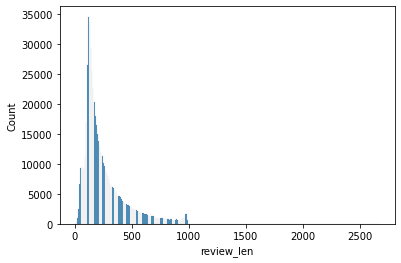

In [ ]:
sns.histplot(data=reviews['review_len'])

<AxesSubplot:xlabel='review_len', ylabel='Count'>

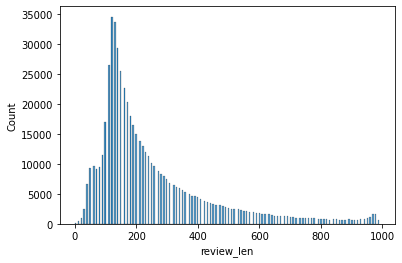

In [ ]:
sns.histplot(data=reviews.where(reviews['review_len'] < 1000)['review_len'])

<AxesSubplot:xlabel='review_len', ylabel='Count'>

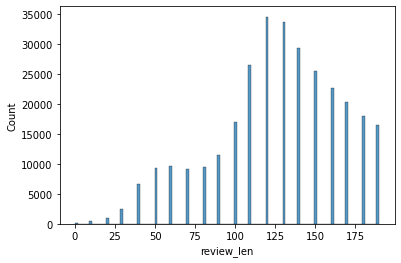

In [ ]:
sns.histplot(data=reviews.where(reviews['review_len'] < 200)['review_len'])

Распределение классов в зависимости от погора длин

<AxesSubplot:ylabel='review_summary'>

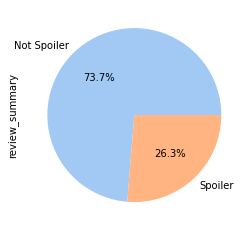

In [ ]:
colors = sns.color_palette('pastel')[0:5]

is_spoiler = reviews.groupby("is_spoiler").count()
is_spoiler["review_summary"].plot.pie(labels=['Not Spoiler', 'Spoiler'], colors=colors, autopct="%.1f%%")

<AxesSubplot:ylabel='review_summary'>

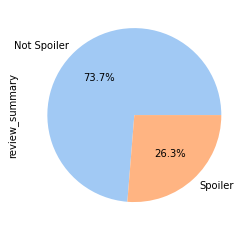

In [ ]:
colors = sns.color_palette('pastel')[0:5]

is_spoiler_1000 = reviews.where(reviews['review_len'] < 1000).groupby("is_spoiler").count()
is_spoiler_1000["review_summary"].plot.pie(labels=['Not Spoiler', 'Spoiler'], colors=colors, autopct="%.1f%%")

<AxesSubplot:ylabel='review_summary'>

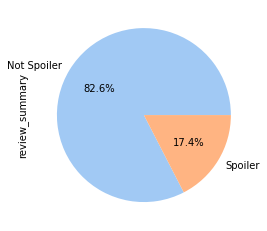

In [ ]:
colors = sns.color_palette('pastel')[0:5]

is_spoiler_200 = reviews.where(reviews['review_len'] < 200).groupby("is_spoiler").count()
is_spoiler_200["review_summary"].plot.pie(labels=['Not Spoiler', 'Spoiler'], colors=colors, autopct="%.1f%%")

<AxesSubplot:ylabel='review_summary'>

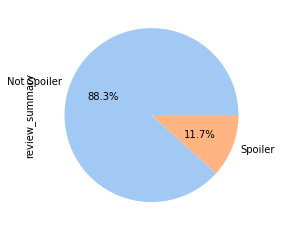

In [ ]:
colors = sns.color_palette('pastel')[0:5]

is_spoiler_130 = reviews.where(reviews['review_len'] < 130).groupby("is_spoiler").count()
is_spoiler_130["review_summary"].plot.pie(labels=['Not Spoiler', 'Spoiler'], colors=colors, autopct="%.1f%%")

#### Специфическая лексика для каждого класса в зависимости от количества слов

In [ ]:
def get_unique_words_for_spoiler_reviews(reviews, ind):
    vectorizer = TfidfVectorizer(stop_words='english')
    review_tfidfs = vectorizer.fit_transform(reviews['review_text'])

    true = reviews['is_spoiler'][0]

    spoiler_tfidfs = review_tfidfs[reviews[reviews['is_spoiler'] == true].index]
    not_spoiler_tfidfs = review_tfidfs[reviews[reviews['is_spoiler'] != true].index]

    spoiler_tfidf_avg = spoiler_tfidfs.tocsc().sum(axis=0)
    not_spoiler_tfidf_avg = not_spoiler_tfidfs.tocsc().sum(axis=0)

    tfidf_diff = spoiler_tfidf_avg - not_spoiler_tfidf_avg

    return pd.DataFrame(data={
        'word '+ind: list(np.squeeze(vectorizer.get_feature_names_out()[(-tfidf_diff).argsort()])),
        'tfidf score '+ind: list(np.asarray(tfidf_diff)[0][(-np.asarray(tfidf_diff)[0]).argsort()])
        })
    
def shrink_text(text, n):
    return ' '.join(text.split()[:n])

In [ ]:
test_reviews = deepcopy(reviews)

In [ ]:
full_text_review = get_unique_words_for_spoiler_reviews(reviews, 'full')

test_reviews['review_text'] = test_reviews['review_text'].progress_apply(lambda x: shrink_text(x, 200))
text_200_review = get_unique_words_for_spoiler_reviews(test_reviews, '200')

test_reviews['review_text'] = test_reviews['review_text'].progress_apply(lambda x: shrink_text(x, 150))
text_150_review = get_unique_words_for_spoiler_reviews(test_reviews, '150')

test_reviews['review_text'] = test_reviews['review_text'].progress_apply(lambda x: shrink_text(x, 100))
text_100_review = get_unique_words_for_spoiler_reviews(test_reviews, '100')

test_reviews['review_text'] = test_reviews['review_text'].progress_apply(lambda x: shrink_text(x, 50))
text_50_review = get_unique_words_for_spoiler_reviews(test_reviews, '50')

100%|██████████| 573913/573913 [00:06<00:00, 89846.47it/s] 


In [ ]:
pd.concat([full_text_review, text_200_review, text_150_review, text_100_review, text_50_review], axis=1).head(40)

,word,tfidf score,word 200,tfidf score 200,word 150,tfidf score 150,word 100,tfidf score 100,word 50,tfidf score 50
0,spoiler,471.391540,spoilers,561.136759,spoilers,624.649390,spoilers,736.354629,spoilers,918.615480
1,spoilers,434.468404,spoiler,457.282731,spoiler,446.083624,spoiler,435.072130,spoiler,429.831494
2,alert,149.575649,alert,153.926945,alert,153.050924,alert,152.402621,warning,163.913171
3,dies,87.531589,dies,46.244071,warning,55.238184,warning,99.667161,alert,147.771454
4,killed,69.959596,rey,34.646839,dir,38.501837,dir,50.998869,contain,92.869708
5,rey,51.224308,warning,28.891777,rey,30.908447,bafta,24.126627,dir,69.686943
6,kylo,45.396940,kylo,28.537389,mandarin,27.562019,mandarin,23.803346,spoilersi,25.036935
7,kills,34.067405,dir,28.249381,dies,27.266034,contain,21.680366,ahead,22.632924
8,snoke,33.855421,mandarin,28.173157,snoke,22.874763,spoilersi,18.480416,recap,18.331514
9,dumbledore,32.758333,snoke,26.030542,kylo,22.730313,rey,18.074507,mild,17.465268


Если посмотреть на слова с наибольшей разницей tf-idf для спойлеров и не-спойлеров, то при изменении длины отсечки текста набор остается примерно одним и тем же, меняется порядок.
Можно предположить, что в спойлерных обзорах чаще употребляются имена персонажей и слова типа "убил", "умер", "убийтво", а еще их отличительной чертой является СПОЙЛЕР АЛЕРТ. С уменьшением длины отзыва это свойство сохраняется, значит, при подаче данных модели можно уменьшить количество слов

Если есть такие маркерные слова, можно попробовать подавать модели лишь отзывы, без сюжета фильма, и сравнить с моделью с контекстом. Вероятно, из-за изобилия имен персонажей роль сыграет и регистр букв, поэтому попробуем cased-модель. 

# Импорты

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import zipfile
from tqdm import tqdm
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import gc
from copy import deepcopy
import warnings
import transformers 
from transformers import RobertaModel, AutoTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import re
from sklearn.model_selection import train_test_split
from collections import defaultdict

tqdm.pandas()

# Скачивание датасета

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d rmisra/imdb-spoiler-dataset

imdb-spoiler-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
with zipfile.ZipFile('imdb-spoiler-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
movie_details = pd.read_json('data/IMDB_movie_details.json', lines=True)
reviews = pd.read_json('data/IMDB_reviews.json', lines=True)

In [ ]:
pat = re.compile(r'                Written by\n.*')

movie_details.plot_summary = movie_details.plot_summary.progress_apply(lambda x: re.sub(pat, "", x))

100%|██████████| 1572/1572 [00:00<00:00, 89349.35it/s]


# Выравнивание классов

In [ ]:
# LEARNING PARAMS

MODEL_NAME = 'aychang/roberta-base-imdb'
MAX_LEN = 200
RANDOM_SEED = 4
BATCH_SIZE = 64
EPOCHS = 10

np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
nsp = reviews[reviews['is_spoiler'] == False].sample(n=16000, random_state=RANDOM_SEED)
sp = reviews[reviews['is_spoiler'] == True].sample(n=16000, random_state=RANDOM_SEED)

all = nsp.append(sp)
all.sort_index(inplace=True)

<ipython-input-8-5e8c9efd873d>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all = nsp.append(sp)


In [ ]:
all = pd.merge(all, movie_details, on='movie_id')

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
class IMDB_spoiler_dataset(Dataset):

  def __init__(self, reviews, plot_summaries, targets, tokenizer, max_len, encode_plot=False):
    self.reviews = reviews
    self.plot_summaries = plot_summaries
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
    self.encode_plot = encode_plot
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    plot_summary = str(self.plot_summaries[item])
    target = self.targets[item]

    if self.encode_plot:
        encoding = self.tokenizer(
            review, 
            plot_summary,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
        )

    else:
        encoding = self.tokenizer(
            review,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
        )

    res = {
      'review_text': review,
      'plot_summary_text': plot_summary,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }
    
    return res

In [ ]:
df_train, df_test = train_test_split(all, test_size=0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [ ]:
del reviews
del movie_details
del nsp
del sp
del all

gc.collect()

41

In [ ]:
def create_data_loader(df, tokenizer, max_len=MAX_LEN, batch_size=BATCH_SIZE):
  ds = IMDB_spoiler_dataset(
    reviews=df.review_text.to_numpy(),
    plot_summaries=df.plot_summary.to_numpy(),
    targets=df.is_spoiler.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len,
    encode_plot=True
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [ ]:
train_data_loader = create_data_loader(df_train, tokenizer)
test_data_loader = create_data_loader(df_test, tokenizer)
val_data_loader = create_data_loader(df_val, tokenizer)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class SpoilerClassifier(nn.Module):

  def __init__(self, n_classes=2):
    super(SpoilerClassifier, self).__init__()
    self.roberta = RobertaModel.from_pretrained(MODEL_NAME)
    self.drop = nn.Dropout(p=0.1)
    self.conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(6, 768), stride=(1, 1), padding=(0, 0))
    self.linear1 = nn.Linear(195, 128)
    self.ReLU = nn.ReLU()
    self.linear2 = nn.Linear(128, 10)
    self.out = nn.Linear(10, n_classes)

  def forward(self, input_ids, attention_mask):
    encoded = self.roberta(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    encoded = self.conv(encoded.last_hidden_state.unsqueeze(1))
    encoded = self.linear1(encoded.view(BATCH_SIZE,-1))
    encoded = self.ReLU(encoded)
    encoded = self.linear2(encoded)
    encoded = self.ReLU(encoded)
    
    return self.out(encoded)

In [ ]:
model = SpoilerClassifier()
model = model.to(device)

Some weights of the model checkpoint at aychang/roberta-base-imdb were not used when initializing RobertaModel: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at aychang/roberta-base-imdb and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
gc.collect()

36

In [ ]:
from transformers.optimization import get_cosine_with_hard_restarts_schedule_with_warmup
optimizer = AdamW(model.parameters(), lr=5e-5)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_cosine_with_hard_restarts_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model.train()

  losses = []
  correct_predictions = 0
  
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
            )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in tqdm(data_loader):
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
# for name, params in model.named_parameters():
#     if name.startswith('roberta.e'):
#         params.requires_grad = False
#     else:
#         print(name)

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [ ]:
def run_epoch(
    epoch, 
    model,
    train_data_loader,
    val_data_loader, 
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    df_train,
    df_val,
    best_accuracy,
    history):
    
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc.cpu())
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc.cpu())
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc


In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    run_epoch(
        epoch, 
        model,
        train_data_loader,
        val_data_loader, 
        loss_fn, 
        optimizer, 
        device, 
        scheduler, 
        df_train,
        df_val,
        best_accuracy,
        history
    )


Epoch 1/10
----------


  0%|          | 0/400 [00:00<?, ?it/s]<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
100%|██████████| 400/400 [14:19<00:00,  2.15s/it]


Train loss 0.6872199216485023 accuracy 0.537421875


  0%|          | 0/50 [00:00<?, ?it/s]<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


Val loss 0.693265016078949 accuracy 0.49343750000000003

Epoch 2/10
----------


  0%|          | 0/400 [00:00<?, ?it/s]<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
100%|██████████| 400/400 [14:31<00:00,  2.18s/it]


Train loss 0.6932745558023453 accuracy 0.4971875


  0%|          | 0/50 [00:00<?, ?it/s]<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


Val loss 0.6932368707656861 accuracy 0.49343750000000003

Epoch 3/10
----------


  0%|          | 0/400 [00:00<?, ?it/s]<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
100%|██████████| 400/400 [14:30<00:00,  2.18s/it]


Train loss 0.6933939272165298 accuracy 0.49941406250000003


  0%|          | 0/50 [00:00<?, ?it/s]<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
100%|██████████| 50/50 [00:36<00:00,  1.39it/s]


Val loss 0.6932946503162384 accuracy 0.49343750000000003

Epoch 4/10
----------


  0%|          | 0/400 [00:00<?, ?it/s]<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
100%|██████████| 400/400 [14:30<00:00,  2.18s/it]


Train loss 0.6933070446550846 accuracy 0.496953125


  0%|          | 0/50 [00:00<?, ?it/s]<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


Val loss 0.693282927274704 accuracy 0.49343750000000003

Epoch 5/10
----------


  0%|          | 0/400 [00:00<?, ?it/s]<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
<ipython-input-11-9877a9a1200a>:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'targets': torch.tensor(target, dtype=torch.long)
 94%|█████████▍| 377/400 [13:43<00:50,  2.19s/it]

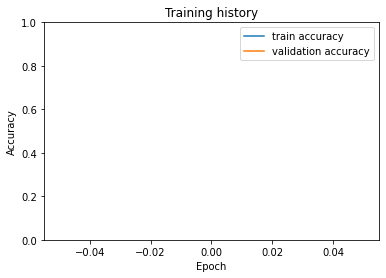

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);